Name: Christopher De La Rosa

Labpartner(s): August Luna

In [1]:
#import statements go here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Class 12.2

# Warmups 11.2

**W.1.** In the scipy lecture notes on statistics go through **Section 3.1.2 Hypothesis testing: comparing two groups** tutorial. Make sure to read up about t-tests and the rest if you are not familiar with these statistical methods.
https://scipy-lectures.org/packages/statistics/index.html#id13

Note you will need to load in the dataset on brains at the beginning of the section

It is suggested you do the rest of the 3.1 section for practice this week. Most of it is review, some of it is new and useful for you all.

In [2]:
data = pd.read_csv('brain_size.csv', sep = ';', na_values = '.')

In [3]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [4]:
stats.ttest_1samp(data['VIQ'], 0) #1-sample

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [5]:
f_viq = data[data['Gender'] == 'Female']['VIQ']
m_viq = data[data['Gender'] == 'Male']['VIQ']

In [6]:
stats.ttest_ind(f_viq,m_viq)  #2-sample independent

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [7]:
stats.ttest_ind(data['FSIQ'],data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [8]:
stats.mannwhitneyu(f_viq,m_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.17114434343636575)

In [9]:
stats.ttest_rel(data['FSIQ'],data['PIQ'])  #2-sample paired

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [10]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'],0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [11]:
stats.wilcoxon(data['FSIQ'],data['PIQ'])  #relaxes Gaussian errors

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [12]:
datanona = data.dropna()

In [13]:
f_weight = datanona[datanona['Gender'] == 'Female']['Weight']
m_weight = datanona[datanona['Gender'] == 'Male']['Weight']

In [14]:
stats.ttest_1samp(f_weight,m_weight)

Ttest_1sampResult(statistic=2     -1.529945
3     -9.179669
8      0.844107
9     -9.179669
11    -3.640213
12    -4.695348
17   -10.762370
19   -11.289937
21   -12.872639
23     1.371675
25    -8.915885
27   -13.136422
31   -14.191557
32   -14.455340
33   -11.553721
36    -1.793728
38    -2.848863
39   -11.026154
Name: Weight, dtype: float64, pvalue=array([1.42509756e-01, 2.05116250e-08, 4.09112081e-01, 2.05116250e-08,
       1.74151837e-03, 1.57567970e-04, 1.59121714e-09, 7.20677940e-10,
       7.84686172e-11, 1.86146544e-01, 3.23128479e-08, 5.53892208e-11,
       1.45257875e-11, 1.05304242e-11, 4.90067422e-10, 8.87883804e-02,
       1.02677829e-02, 1.06709859e-09]))

# Lecture 12.2

### Agenda:


Some useful things to do with a timeseries
- datetime objects
- moving averages
- detrending

#### Datetime Objects in python and pandas

Python has a wonderful feature called datetime objects. These are super-useful if you are dealing with any data that has a timestamp. They are a bit tricky to get used to, but worth the effort, and the alternatives are usually much more painful (trust me on this one). 

Documentation: 
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://docs.python.org/3/library/datetime.html

There is a lot you can do with these. Here we will just cover the basics. Dig in to the documentation if you need something specfic.

Note that Victoria used these in her sample code to make movie frames for HYCOM data: https://github.com/chsharrison/IntroSciComp_S2021/blob/main/Class_materials/Hycom-CartopyDemo%20-%20updated.ipynb

In [15]:
from datetime import datetime, timedelta
import pandas as pd

#### Defining a specfic date

In [16]:
date1 = datetime(1996,1,1) 

In [17]:
# this is a datetime object
date1

datetime.datetime(1996, 1, 1, 0, 0)

In [18]:
# print out the date
print(date1)

1996-01-01 00:00:00


In [19]:
# you can also format the date as a string however you like (useful for plots)
date1.strftime("%m/%d/%Y")

'01/01/1996'

In [20]:
# defining a date with hours, minutes and seconds
date2 = datetime(1996,1,1, 13, 34, 6) # note using 24 clock (miltary time) here

In [21]:
print(date2)

1996-01-01 13:34:06


In [22]:
#what is going to happen here?
date2.strftime("%m-%d-%Y")

'01-01-1996'

In [23]:
date1.today() #somehow it knows what timezone I am (probably from my computer)

datetime.datetime(2021, 4, 17, 19, 38, 15, 104627)

#### If we want to increment the date we can use timedelta

In [24]:
date1 = date1 + timedelta(days=1)
print(date1)

1996-01-02 00:00:00


In [25]:
date1 = date1 + timedelta(minutes = 2, seconds=1)
print(date1)

1996-01-02 00:02:01


In [26]:
# you can also do things like add fractional days
date1 = date1 + timedelta(days=1.5)
print(date1)

1996-01-03 12:02:01


We can find the time difference between two dates

In [27]:
timediff = date2-date1
timediff

datetime.timedelta(days=-2, seconds=5525)

#### We can also define timeseries using pandas 

In [28]:
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize=False,
    name=None,
    closed=None,
    **kwargs,
) -> pandas.core.indexes.datetimes.DatetimeIndex
Docstring:
Return a fixed frequency DatetimeIndex.

Parameters
----------
start : str or datetime-like, optional
    Left bound for generating dates.
end : str or datetime-like, optional
    Right bound for generating dates.
periods : int, optional
    Number of periods to generate.
freq : str or DateOffset, default 'D'
    Frequency strings can have multiples, e.g. '5H'. See
    :ref:`here <timeseries.offset_aliases>` for a list of
    frequency aliases.
tz : str or tzinfo, optional
    Time zone name for returning localized DatetimeIndex, for example
    'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
    timezone-naive.
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range.
name : str, default None
    Name 

In [29]:
# note the default is daily
my_daterange = pd.date_range(start='1/1/2018', end='1/08/2018')

In [30]:
my_daterange

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [31]:
# this can be indexed like any array
my_daterange[0]
# note the result is a timestamp, which is similar to a datetime object, but not exactly

Timestamp('2018-01-01 00:00:00', freq='D')

In [32]:
print(my_daterange[1])

2018-01-02 00:00:00


In [33]:
# you can convert a datetime to a timestamp
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [34]:
# we can also specfiy the frequency
my_daterange2 = pd.date_range(start='1/1/2018',end = '1/1/2021', freq='M')
my_daterange2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

See the documentation for lots more functionality

### Working with timeseries data: global sea surface temperature (SST)

We are going to be using some data from the epa website here: https://www.epa.gov/climate-indicators/climate-change-indicators-sea-surface-temperature

This is globally averaged Extended Reconstructed Sea Surface Temperature (ERSST)v.4 from NOAA, which combines satilite, ship and other in situ (in place, i.e. in the water) data. If you follow the links on the above you can get the gridded (i.e. map) product in netcdf format for the latest product (v.5). We are just going to play around with the globally averaged data

In [35]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 28: invalid start byte

In [36]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                encoding = 'latin1')

In [37]:
sst

,"Figure 1. Average Global Sea Surface Temperature, 1880-2015",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN
1,"Data source: NOAA, 2016",NaN,NaN,NaN
2,Web update: August 2016,NaN,NaN,NaN
3,Units: temperature anomaly (°F),NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
137,2011,0.4286736,0.13328918,0.72405802
138,2012,0.528696,0.232869466,0.824522534
139,2013,0.5846742,0.28922658,0.88012182
140,2014,0.7512552,0.45580758,1.04670282


In [38]:
sst= pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-surface-temp_fig-1.csv',
                 index_col = 0, # this makes the year the index
                  header = 6,
                 #skiprows = [0,1,2,3,4,5], # this works too, need to skip all the comments
                 encoding ='latin1' # had to do this to get it to work, thanks stack exchange
                )

In [39]:
sst

,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
Year,,,
1880,-0.470009,-0.672646,-0.267371
1881,-0.356879,-0.560588,-0.153169
1882,-0.372661,-0.575728,-0.169594
1883,-0.448443,-0.650804,-0.246082
1884,-0.589754,-0.790478,-0.389030
...,...,...,...
2011,0.428674,0.133289,0.724058
2012,0.528696,0.232869,0.824523
2013,0.584674,0.289227,0.880122


<AxesSubplot:xlabel='Year'>

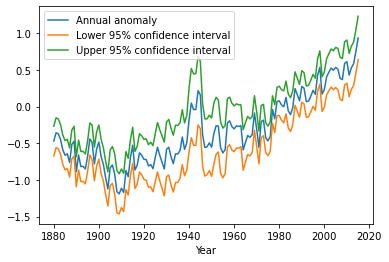

In [40]:
sst.plot()

In [41]:
#Set plotting formats
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [13.0, 6.0]
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

<AxesSubplot:xlabel='Year'>

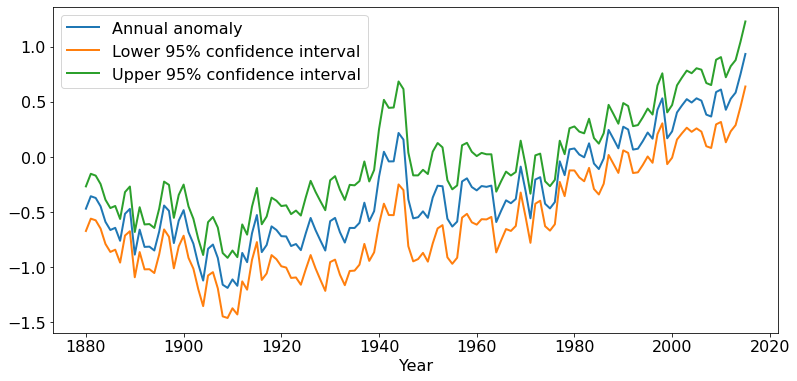

In [42]:
sst.plot()

1850 is usually considered the beginning of the industrial revolution, so before human affected climate by burning fossil fuels (but we did major land use changes and had impacts on many species' extinctions)

There is a definate trend in the data, with a big excursion in the 1940s

Let's ask some research questions. We will start these in lecture and you will finish them in lab:
- What is the trend in this data, that is how fast is SST increasing with time? 
- If we choose a different window for the trend analysis, how does this affect the answer?
- What causes all the interannual variablilty? If we detrend the data how does it look? Can we compare this with climate variabiltiy indices?
- What happened in the 1940s?

see: https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/

I am much more comfortable doing data analysis in xarray so I'm converting the pandas dataframe to an xarray dataset

In [43]:
import xarray as xr

In [44]:
sst_ds = sst.to_xarray()

In [45]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

If we want, we can add a pandas date range to this timeseries and use this for plotting. Not super needed here because it's annual, but would be useful if it was monthly or daily.

In [46]:
ssha_dates = pd.date_range(start = '1880', end = '2015', freq='Y')

In [47]:
ssha_dates

DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=135, freq='A-DEC')

In [48]:
# let's just work with the annual anomaly

sst_ds["Annual anomaly"] # note a lot of the syntax in xarray is similar to pandas

<xarray.DataArray 'Annual anomaly' (Year: 136)>
array([-0.4700088, -0.3568788, -0.3726612, -0.448443 , -0.5897538,
       -0.6636546, -0.6439392, -0.7616232, -0.5166342, -0.4717926,
       -0.8875836, -0.6603264, -0.8173098, -0.8148276, -0.84978  ,
       -0.6772536, -0.4412844, -0.4894326, -0.78255  , -0.578736 ,
       -0.4833054, -0.6831072, -0.7883226, -0.9732618, -1.123038 ,
       -0.8347986, -0.795843 , -0.917685 , -1.160703 , -1.189773 ,
       -1.112769 , -1.1706066, -0.8718498, -0.9557658, -0.6931926,
       -0.5274864, -0.8644752, -0.7996338, -0.6306858, -0.6633414,
       -0.7196544, -0.7222464, -0.8093034, -0.7910208, -0.8465382,
       -0.6946722, -0.554238 , -0.6640884, -0.7589772, -0.8502282,
       -0.5835816, -0.5537106, -0.683568 , -0.7777674, -0.6447312,
       -0.6452784, -0.5988258, -0.4155462, -0.5834772, -0.4924098,
       -0.1797678,  0.0471582, -0.0406296, -0.039807 ,  0.2180826,
        0.157752 , -0.3853548, -0.5579568, -0.5477346, -0.4941792,
       -0.5531796, -0.368496 , -0.2612952, -0.2661372, -0.5613282,
       -0.632412 , -0.5871312, -0.2226618, -0.1943208, -0.2735424,
       -0.3035772, -0.2642508, -0.2717028, -0.260397 , -0.5913306,
       -0.489249 , -0.39411  , -0.4203576, -0.38187  , -0.0876366,
       -0.3086334, -0.5571756, -0.2051676, -0.1836738, -0.4251924,
       -0.4675428, -0.4096278, -0.0397692, -0.165393 ,  0.0692586,
        0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1880 1881 1882 1883 1884 ... 2011 2012 2013 2014 2015

#### Let's do a linear fit of the whole timeseries

In [49]:
from scipy import stats

In [50]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_entire = stats.linregress(sst_ds.Year, sst_ds["Annual anomaly"])

In [51]:
ssta_trend_entire

LinregressResult(slope=0.010013503267496782, intercept=-19.822035179626454, rvalue=0.8362694544139663, pvalue=8.796275453011977e-37, stderr=0.0005671794277975704)

In [52]:
ssta_trend_entire.slope

0.010013503267496782

The value I am interested in is the slope, what is this? What are the units?
- Rate that temperature is increasing (degrees F/Year)

Let's plot the line to see the fit. The equation is y = mx + b, where m is the slope and b is the intercept, what are x and y in this case?
- x is time
- y is temprature

In [53]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'SSTA ($\\degree$F)')

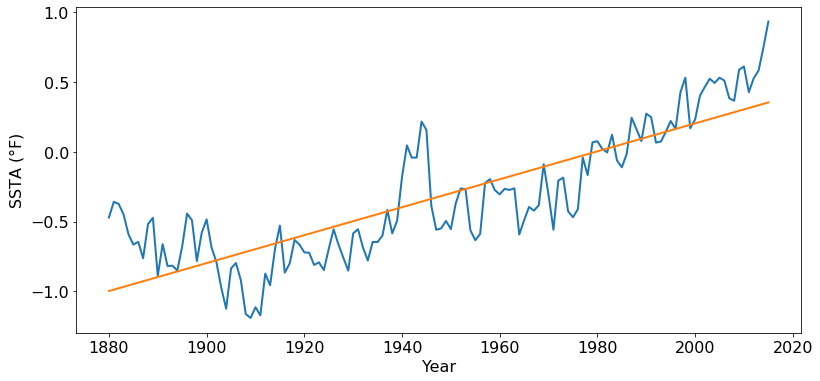

In [54]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

How good of a fit is this for the last few decades?
It's not so good, the trend is faster, steeper

#### Let's do a linear fit for the last few decades and see what we get.

How do we access the later data?

In [55]:
sst_ds.Year[100:]

<xarray.DataArray 'Year' (Year: 36)>
array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [56]:
sst_ds["Annual anomaly"][100:]

<xarray.DataArray 'Annual anomaly' (Year: 36)>
array([ 0.0771966,  0.0219924, -0.0032202,  0.1239354, -0.0596304,
       -0.109917 , -0.0137916,  0.2456388,  0.1634436,  0.0785898,
        0.274842 ,  0.2497932,  0.0669942,  0.0748224,  0.1436454,
        0.2219328,  0.1661922,  0.428193 ,  0.5327244,  0.1698606,
        0.2325024,  0.4042188,  0.4671414,  0.5250798,  0.4946364,
        0.5327874,  0.5114556,  0.3846042,  0.3673116,  0.5894424,
        0.6127182,  0.4286736,  0.528696 ,  0.5846742,  0.7512552,
        0.935577 ])
Coordinates:
  * Year     (Year) int64 1980 1981 1982 1983 1984 ... 2011 2012 2013 2014 2015

In [57]:
# the syntax for this function is x,y, so time, ssta
ssta_trend_1980_on = stats.linregress(sst_ds.Year[100:], sst_ds["Annual anomaly"][100:])

In [58]:
ssta_trend_1980_on

LinregressResult(slope=0.02071126030888031, intercept=-41.05951991698842, rvalue=0.8829830021529422, pvalue=1.0383113887943917e-12, stderr=0.0018882626420977902)

In [59]:
ssta_trend_1980_on.slope # 0.02 F/ year. 0.2 F /10 years

0.02071126030888031

Text(0, 0.5, 'SSTA ($\\degree$F)')

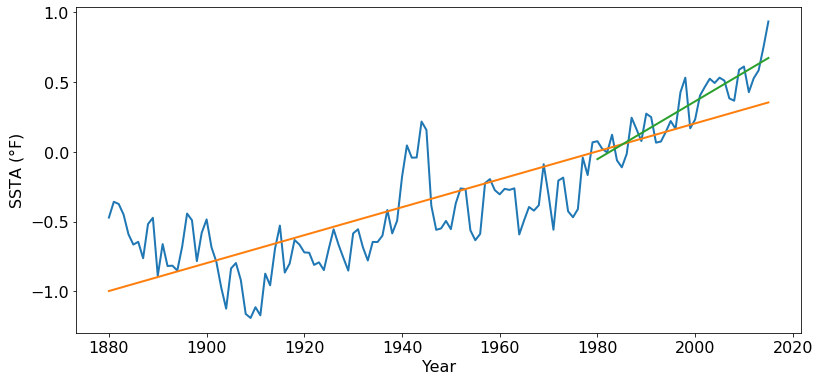

In [60]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year, ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept)
plt.plot(sst_ds.Year[100:], ssta_trend_1980_on.slope*sst_ds.Year[100:] + ssta_trend_1980_on.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

#### Detrending the data
Let's say we were interested in the variability outside of the trend. How do we detrend the data?

In [61]:
trend_entire = ssta_trend_entire.slope*sst_ds.Year + ssta_trend_entire.intercept


In [62]:
sst_detrended = sst_ds["Annual anomaly"] - trend_entire

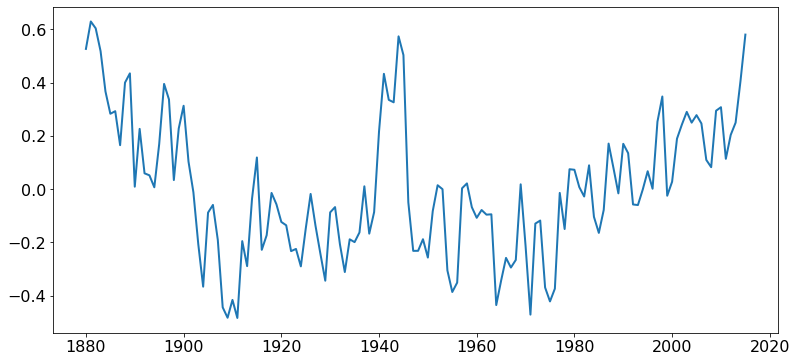

In [63]:
plt.plot(sst_ds.Year, sst_detrended)

#### Creating a moving average, i.e. filtering or smoothing.
Let's say we wanted to smooth the data to remove some of the variability, how would we do this?

I want to do a three year running mean, so for each datapoint, average the year before, the current year and the year after and save that to the current year as the new data.

if i is my current year index

(data[j+1] + data [j] + data [j-1])/3 to average the three years of data

Going to have to start at the second year, since I don't have a previous year


pseudo code:

create an array to save the new data in

Loop through all the years
 take a mean of the current, previous and next years, save to some new arrray


In [64]:
import numpy as np

In [65]:
sst_ds["Annual anomaly"].shape

(136,)

In [66]:
# initialize my array
ssta_filtered = np.zeros(136)

for i in range(134): # loop through all the years, skip the last index
    #print(i+1) #skip the first index
    ssta_filtered[i+1] = (sst_ds["Annual anomaly"][i] + sst_ds["Annual anomaly"][i+1] + sst_ds["Annual anomaly"][i+2])/3


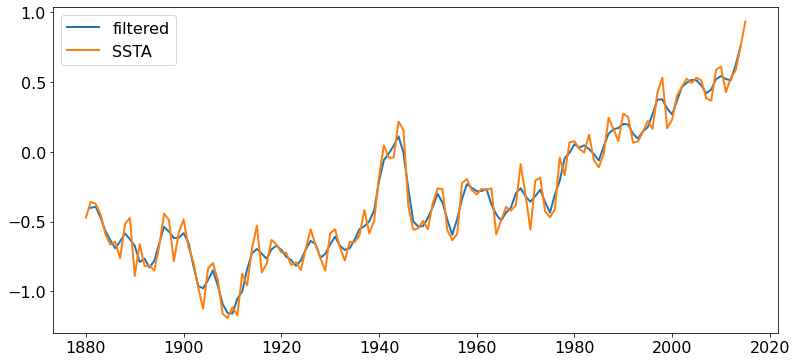

In [67]:
plt.plot(sst_ds.Year[1:-1],ssta_filtered[1:-1], label = "filtered")
plt.plot(sst_ds.Year,sst_ds["Annual anomaly"], label = 'SSTA')
plt.legend()

# Lab 12.2

**E.1** Define a datetime object that is your birthday. Increment this date using timedelta by a) ten weeks, b) five minutes, c) two years (tricky!) Hint: see help(timedelta)

In [69]:
birthday = datetime(1997,6,11)
print(birthday)

1997-06-11 00:00:00


In [70]:
birthday_plus_10weeks = birthday + timedelta(weeks = 10)
print(birthday_plus_10weeks)

1997-08-20 00:00:00


In [71]:
birthday_plus_5minutes = birthday + timedelta(minutes = 5)
print(birthday_plus_5minutes)

1997-06-11 00:05:00


In [72]:
help(timedelta)

Help on class timedelta in module datetime:

class timedelta(builtins.object)
 |  Difference between two datetime values.
 |  
 |  timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
 |  
 |  All arguments are optional and default to 0.
 |  Arguments may be integers or floats, and may be positive or negative.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, v

In [74]:
birthday_plus_2years = birthday + timedelta(days = (365*2))
print(birthday_plus_2years)

1999-06-11 00:00:00


**E.2** Define a daterange for your birthday every year of your life

In [80]:
birthday_daterange = pd.date_range(start = '6/11/1997', end = '6/11/2097', freq = '365.25D', closed = 'right')
print(birthday_daterange)

DatetimeIndex(['1998-06-11 06:00:00', '1999-06-11 12:00:00',
               '2000-06-10 18:00:00', '2001-06-11 00:00:00',
               '2002-06-11 06:00:00', '2003-06-11 12:00:00',
               '2004-06-10 18:00:00', '2005-06-11 00:00:00',
               '2006-06-11 06:00:00', '2007-06-11 12:00:00',
               '2008-06-10 18:00:00', '2009-06-11 00:00:00',
               '2010-06-11 06:00:00', '2011-06-11 12:00:00',
               '2012-06-10 18:00:00', '2013-06-11 00:00:00',
               '2014-06-11 06:00:00', '2015-06-11 12:00:00',
               '2016-06-10 18:00:00', '2017-06-11 00:00:00',
               '2018-06-11 06:00:00', '2019-06-11 12:00:00',
               '2020-06-10 18:00:00', '2021-06-11 00:00:00',
               '2022-06-11 06:00:00', '2023-06-11 12:00:00',
               '2024-06-10 18:00:00', '2025-06-11 00:00:00',
               '2026-06-11 06:00:00', '2027-06-11 12:00:00',
               '2028-06-10 18:00:00', '2029-06-11 00:00:00',
               '2030-06-

**E.3** Print all your birthdays out as month, day, year (no minutes, etc)

In [77]:
birthday_daterange.strftime('%m-%d-%Y')

Index(['06-11-1998', '06-11-1999', '06-10-2000', '06-11-2001', '06-11-2002',
       '06-11-2003', '06-10-2004', '06-11-2005', '06-11-2006', '06-11-2007',
       '06-10-2008', '06-11-2009', '06-11-2010', '06-11-2011', '06-10-2012',
       '06-11-2013', '06-11-2014', '06-11-2015', '06-10-2016', '06-11-2017',
       '06-11-2018', '06-11-2019', '06-10-2020', '06-11-2021', '06-11-2022',
       '06-11-2023', '06-10-2024', '06-11-2025', '06-11-2026', '06-11-2027',
       '06-10-2028', '06-11-2029', '06-11-2030', '06-11-2031', '06-10-2032',
       '06-11-2033', '06-11-2034', '06-11-2035', '06-10-2036', '06-11-2037',
       '06-11-2038', '06-11-2039', '06-10-2040', '06-11-2041', '06-11-2042',
       '06-11-2043', '06-10-2044', '06-11-2045', '06-11-2046', '06-11-2047',
       '06-10-2048', '06-11-2049', '06-11-2050', '06-11-2051', '06-10-2052',
       '06-11-2053', '06-11-2054', '06-11-2055', '06-10-2056', '06-11-2057',
       '06-11-2058', '06-11-2059', '06-10-2060', '06-11-2061', '06-11-2062',

**E.4** Go through the tutorial on datetimes in pandas here: https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587 Type in all the examples here in the lab.

In [82]:
df = pd.DataFrame({'date':['3/10/2000','3/11/2000','3/12/2000'],
                    'value':[2,3,4]})

In [83]:
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [86]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

In [87]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


In [88]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], format="%Y-%d-%m %H:%M:%S")
df

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


In [90]:
# Make up 3000 rows
df = pd.DataFrame({'date': ['3/11/2000', '3/12/2000', '3/13/2000'] * 1000 })
%timeit pd.to_datetime(df['date'], infer_datetime_format=True)
#100 loops, best of 3: 10.4 ms per loop
%timeit pd.to_datetime(df['date'], infer_datetime_format=False)
#1 loop, best of 3: 471 ms per loop

3.75 ms ± 436 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.09 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [93]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'])

ParserError: Unknown string format: a/11/2000

In [94]:
df['date'] = pd.to_datetime(df['date'], errors='ignore')
df

,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [95]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [96]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
df['date'] = pd.to_datetime(df)
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [97]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})
df['DoB'] = pd.to_datetime(df['DoB'])

In [98]:
df['year']= df['DoB'].dt.year
df['month']= df['DoB'].dt.month
df['day']= df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [99]:
df['week_of_year'] = df['DoB'].dt.week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

<ipython-input-99-15c8aa70e488>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['DoB'].dt.week


,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [100]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


In [101]:
today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,24
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,25
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,26


In [102]:
# Year difference
today = pd.to_datetime('today')
diff_y = today.year - df['DoB'].dt.year
# Haven't had birthday
b_md = df['DoB'].apply(lambda x: (x.month,x.day) )
no_birthday = b_md > (today.month,today.day)
df['age'] = diff_y - no_birthday
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,23
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,24
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,25


In [105]:
df = pd.read_csv('city_sales.csv',parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795144 entries, 0 to 1795143
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   num     int64         
 2   city    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 41.1+ MB


In [106]:
df = df.set_index(['date'])
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


In [107]:
df.loc['2018']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [108]:
df.loc['2018','num'].sum()

1231190

In [111]:
df['2018'].groupby('city').sum()

AssertionError: <class 'numpy.ndarray'>

In [112]:
df.loc['2018-5']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-31 15:56:00,3,Cambridge
2018-05-31 15:57:00,4,Cambridge
2018-05-31 15:58:00,2,Cambridge


In [113]:
df.loc['2018-5-1']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-01 15:56:00,2,Cambridge
2018-05-01 15:57:00,3,Cambridge
2018-05-01 15:58:00,3,Cambridge


In [114]:
df.loc['2016' : '2018']

,num,city
date,,
2016-01-01 09:00:00,4,London
2016-01-01 09:01:00,3,London
2016-01-01 09:02:00,4,London
2016-01-01 09:03:00,4,London
2016-01-01 09:04:00,2,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [115]:
df.loc['2018-5-2 10' : '2018-5-2 11' ]

,num,city
date,,
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
2018-05-02 10:02:00,4,London
2018-05-02 10:03:00,4,London
2018-05-02 10:04:00,4,London
...,...,...
2018-05-02 11:55:00,3,Cambridge
2018-05-02 11:56:00,3,Cambridge
2018-05-02 11:57:00,4,Cambridge


In [116]:
df.loc['2018-5-2 10:30' : '2018-5-2 10:45' ]

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:31:00,3,London
2018-05-02 10:32:00,1,London
2018-05-02 10:33:00,3,London
2018-05-02 10:34:00,3,London
...,...,...
2018-05-02 10:41:00,3,Cambridge
2018-05-02 10:42:00,3,Cambridge
2018-05-02 10:43:00,3,Cambridge


In [117]:
df.between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:31:00,3,London
2015-01-01 10:32:00,3,London
2015-01-01 10:33:00,3,London
2015-01-01 10:34:00,4,London
...,...,...
2019-01-31 10:41:00,3,Cambridge
2019-01-31 10:42:00,3,Cambridge
2019-01-31 10:43:00,1,Cambridge


In [118]:
df['rolling_sum'] = df.rolling(3).sum()
df.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.0
2015-01-01 09:03:00,3,London,10.0
2015-01-01 09:04:00,3,London,9.0


In [119]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,num,city,rolling_sum,rolling_sum_backfilled
date,,,,
2015-01-01 09:00:00,4,London,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,11.0
2015-01-01 09:03:00,3,London,10.0,10.0
2015-01-01 09:04:00,3,London,9.0,9.0


**E.5** Do a linear fit of the SSTA data from 1940 to 1970. What trend do you get? How confident are you in this result? How does it compare to the trends we did in lecture (use quantitative data to explain).

In [120]:
sst_ds

<xarray.Dataset>
Dimensions:                        (Year: 136)
Coordinates:
  * Year                           (Year) int64 1880 1881 1882 ... 2014 2015
Data variables:
    Annual anomaly                 (Year) float64 -0.47 -0.3569 ... 0.9356
    Lower 95% confidence interval  (Year) float64 -0.6726 -0.5606 ... 0.6401
    Upper 95% confidence interval  (Year) float64 -0.2674 -0.1532 ... 1.231

In [121]:
sst_ds.Year[60:91]

<xarray.DataArray 'Year' (Year: 31)>
array([1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970], dtype=int64)
Coordinates:
  * Year     (Year) int64 1940 1941 1942 1943 1944 ... 1966 1967 1968 1969 1970

In [123]:
sst_ds_mid20th = stats.linregress(sst_ds.Year[60:91], sst_ds["Annual anomaly"][60:91])
sst_ds_mid20th

LinregressResult(slope=-0.008184913548387096, intercept=15.69453642580645, rvalue=-0.33625811590031707, pvalue=0.06437970871891731, stderr=0.00425683789714022)

In [124]:
sst_ds_mid20th.slope

-0.008184913548387096

Text(0, 0.5, 'SSTA ($\\degree$F)')

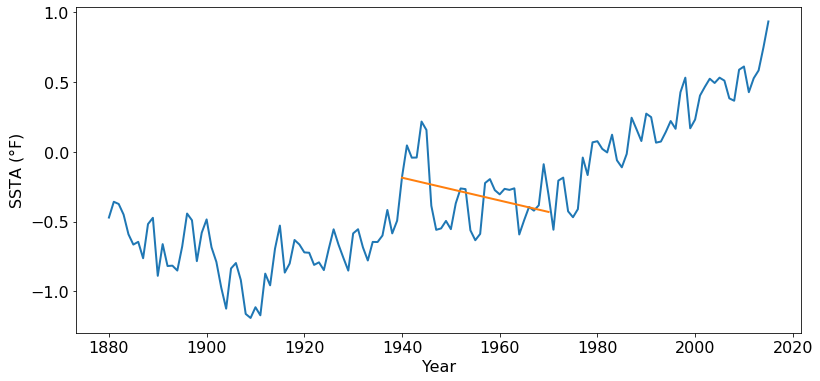

In [125]:
plt.plot(sst_ds.Year, sst_ds["Annual anomaly"])
plt.plot(sst_ds.Year[60:91], sst_ds_mid20th.slope*sst_ds.Year[60:91] + sst_ds_mid20th.intercept)
plt.xlabel('Year')
plt.ylabel('SSTA ($\degree$F)')

In [ ]:
#It is a decent graph, but it now trends downwards which is in contrast to most with the trends we already analyzed.
#ALso, the p-value is above 0.05 which indicates no statistical significance.

**E.6** According to the internet, what might have caused this decline in SST during this perioud? Write a few sentances explaining this and cite your sources here.

In [128]:
#It is probably due to combined factors of aerosol emittance into the atmosphere due to increased amounts of burned fossil fuels.
#Industrial production increased greatly after WW2, leading to heightened fossil fuel burning to help supply meet demand.
#These extra fossil fuel emissions caused atmospheric damage that made it harder for solar radiation to stay within the atmosphere, while
#conversely also making it harder for it to escape.

source = 'https://earthobservatory.nasa.gov/features/GISSTemperature/giss_temperature4.php#:~:text=Hansen%20suspects%20the%20relatively%20sudden,cooling%20trend%20from%201940%2D1970'

**E.7** Detrend from 1970 on and plot your result. Compare this to an ENSO (El Nino) index and speculate on what may have caused this interannual variability. How does ENSO affect SST and why?

In [131]:
seventies_on = stats.linregress(sst_ds.Year[90:], sst_ds["Annual anomaly"][90:])

In [132]:
seventies_on

LinregressResult(slope=0.0231983908973173, intercept=-46.03777006290472, rvalue=0.9220490019048976, pvalue=9.424068042507898e-20, stderr=0.0014681505420044156)

In [134]:
seventies_on_eq = seventies_on.slope*sst_ds.Year[90:]+seventies_on.intercept

In [135]:
detrended_seventies = sst_ds["Annual anomaly"][90:] - seventies_on_eq

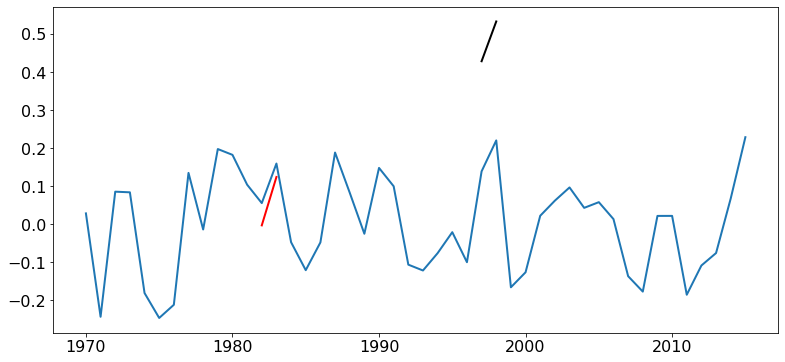

In [136]:
plt.plot(sst_ds.Year[90:], detrended_seventies)
plt.plot(sst_ds.Year[102:104], sst_ds["Annual anomaly"][102:104], color = 'red')
plt.plot(sst_ds.Year[117:119], sst_ds["Annual anomaly"][117:119], color = 'black')

**E.8** (Advanced) Perform a five year moving average of your detrended data from E.7. Explain your result in relation to the periodicity of ENSO.

In [140]:
detrended_seventies.shape

(46,)

In [141]:
zeroes = np.zeros(46)

In [142]:
for i in range(44):
    zeroes[i] = (detrended_seventies[i] + detrended_seventies[i+1] + detrended_seventies[i+2] + detrended_seventies[i-1] + detrended_seventies[i-2])/5

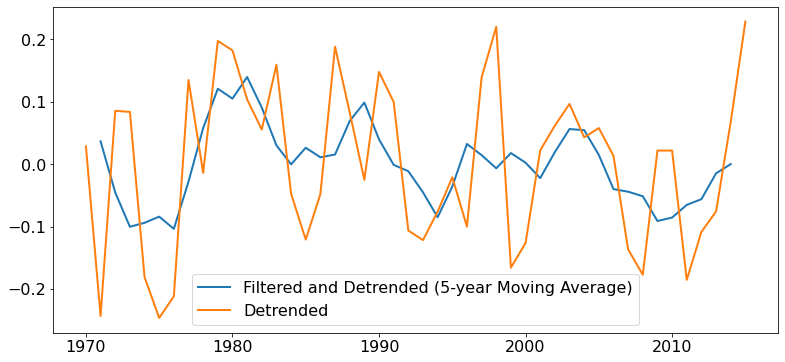

In [144]:
plt.plot(sst_ds.Year[91:-1], zeroes[1:-1], label = 'Filtered and Detrended (5-year Moving Average)')
plt.plot(sst_ds.Year[90:], detrended_seventies, label = 'Detrended')
plt.legend()

**PRACTICE **

In [145]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [147]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [148]:
data.shape

(40, 8)

In [149]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [150]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [151]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [152]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [153]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4
